<a href="https://colab.research.google.com/github/joykiriba/MORINGA-DS-CORE-WEEK6-IP/blob/main/Main_%22Moringa_Data_Science_Core_W6_Independent_Project_2021_05_Joy_Kiriba_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making predictions for Mchezopesa Football Results

##**1**. Defining the Question




### a) Specifying the Data Analytic Question

How can we predict the results of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly.

### b) Defining the Metric for Success
Deriving a high accuracy level from the prediction models we use.


### c) Understanding the context
As a data scientist at Mchezopesa Ltd and I have been tasked to design models that will predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly  





### d) Recording the Experimental Design
### The process will entail: 
Perform EDA

Perform any necessary feature engineering 

Check for multicollinearity

Start building the model

Cross-validate the model

Compute RMSE

Create residual plots for models created, and assess their heteroscedasticity using Bartlett’s test    


### e) Data Relevance

The appropriate datasets to use for this project are those that contain data on the results of different matches and the rankings of the respective teams during those matches.


##**2**. Reading the Data

In [1]:
# importing necessary libraries
# 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt


In [2]:
# Loading the Data from the source- fifa ranking
# ---
#
ranking = pd.read_csv('fifa_ranking.csv')



In [3]:
# Loading the Data from the source- results
# ---
#
results = pd.read_csv('results.csv')


##**3**. Checking the Data

In [4]:
# Determining the no. of records in our datasets- fifa ranking
#
ranking.shape

(57793, 16)

In [5]:
# Determining the no. of records in our datasets- results
# 
results.shape

(40839, 9)

In [6]:
# Previewing our dataset- fifa ranking
#
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [7]:
# Previewing our dataset- results
#
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
# Previewing the bottom of our dataset- fifa ranking
# 
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [9]:
# Previewing the bottom of our dataset- results
# 
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [10]:
# Checking whether each column has an appropriate datatypes
#
print(ranking.dtypes)
print(results.dtypes)

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


In [11]:
# to get general info on the dataframes

print(ranking.info())
print(results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [12]:
# to get a statistical summary of the dataframes

print(ranking.describe())
print(results.describe())

               rank  total_points  ...  three_year_ago_avg  three_year_ago_weighted
count  57793.000000  57793.000000  ...        57793.000000             57793.000000
mean     101.628086    122.068637  ...           59.173916                11.834811
std       58.618424    260.426863  ...          135.533343                27.106675
min        1.000000      0.000000  ...            0.000000                 0.000000
25%       51.000000      0.000000  ...            0.000000                 0.000000
50%      101.000000      0.000000  ...            0.000000                 0.000000
75%      152.000000     92.790000  ...           21.250000                 4.250000
max      209.000000   1775.030000  ...         1200.770000               240.150000

[8 rows x 12 columns]
         home_score    away_score
count  40839.000000  40839.000000
mean       1.745709      1.188105
std        1.749145      1.405120
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.0000

##**4**. External Data Source Validation

### a.Validation

##**5**. Tidying the Dataset

In [13]:
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [14]:
# dropping unnecesary columns
# 

ranking.drop(['country_abrv','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
              'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
              'three_year_ago_avg', 'three_year_ago_weighted'], axis=1, inplace=True)
ranking.head()

,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,0.0,57,0,UEFA,1993-08-08
1,2,Italy,0.0,57,0,UEFA,1993-08-08
2,3,Switzerland,0.0,50,9,UEFA,1993-08-08
3,4,Sweden,0.0,55,0,UEFA,1993-08-08
4,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08


In [15]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [16]:
# delete unnecessary columns in the results dataset.
# 

results.drop(['neutral', 'city'], axis=1, inplace=True)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,England
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,England
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland


In [17]:
# check for duplicates

print('The duplicates in the ranking dataset are:', ranking.duplicated().sum())
print('The duplicates in the results dataset are:', results.duplicated().sum())



The duplicates in the ranking dataset are: 37
The duplicates in the results dataset are: 1


In [18]:
# removing duplicates
# 
ranking = ranking.drop_duplicates()
print(ranking.duplicated().sum())
results = results.drop_duplicates()
print(results.duplicated().sum())

0
0


In [19]:
# Identifying the Missing Data
#
print(ranking.isnull().sum())
print(results.isnull().sum())


rank               0
country_full       0
total_points       0
previous_points    0
rank_change        0
confederation      0
rank_date          0
dtype: int64
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
dtype: int64


In [20]:
# Dealing with the Missing Data
#
# there are no missing values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

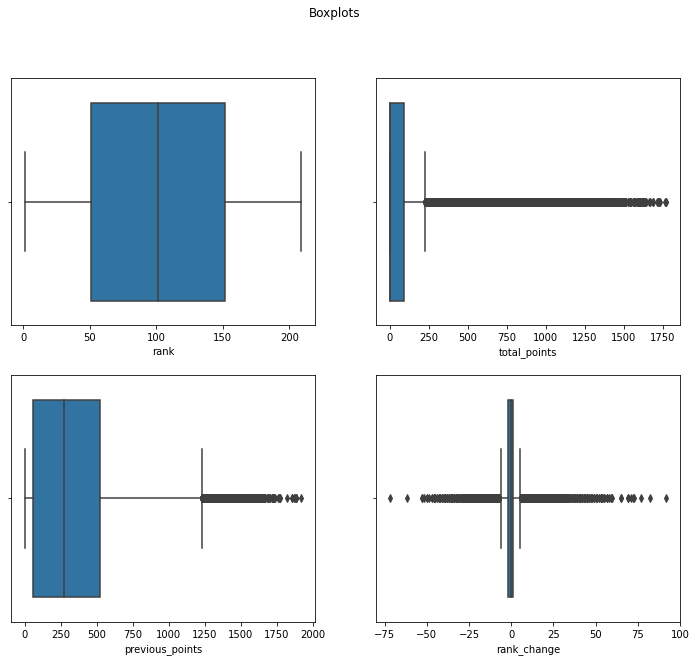

In [21]:
# checking for outliers- fifa ranking
# 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12, 10))
fig.suptitle('Boxplots')
sns.boxplot(ranking['rank'], ax=ax1)
sns.boxplot(ranking['total_points'], ax=ax2)
sns.boxplot(ranking['previous_points'], ax=ax3)
sns.boxplot(ranking['rank_change'], ax=ax4)

In [22]:
# getting rid of the outliers

# Q1 = ranking.quantile(0.25)
# Q3 = ranking.quantile(0.75)
# print(Q1)
# print(Q3)
# IQR = Q3 - Q1
# print(IQR)
# ranking = ranking[~((ranking < (Q1 - 1.5 * IQR)) | (ranking > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(ranking.shape)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


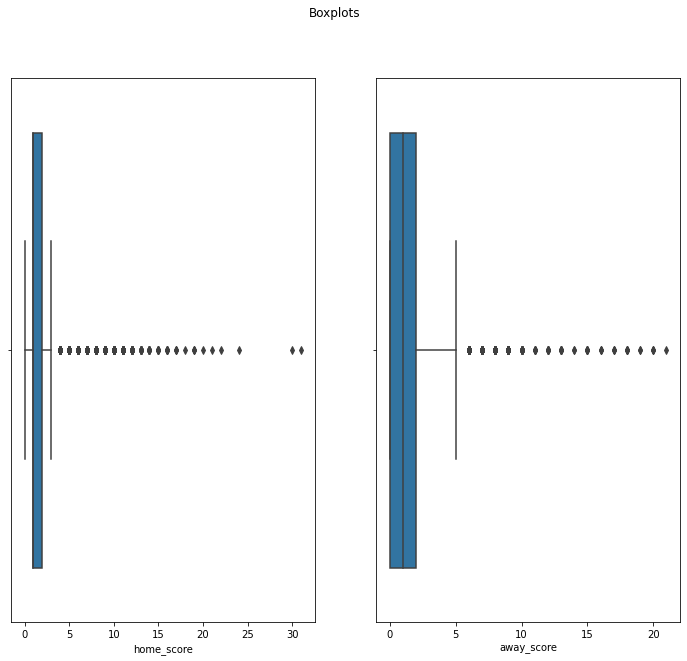

In [23]:
# checking for outliers- results
# 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 10))
fig.suptitle('Boxplots')
sns.boxplot(results['home_score'], ax=ax1)
sns.boxplot(results['away_score'], ax=ax2)


In [24]:
# getting rid of ourtliers
# 
# Q1_r = results.quantile(0.25)
# Q3_r = results.quantile(0.75)
# IQR_r = Q3_r - Q1_r
# print(Q1_r)
# print(Q3_r)
# print(IQR_r)

# results = results[~((results < (Q1_r - 1.5 * IQR_r)) | (results > (Q3_r + 1.5 * IQR_r))).any(axis=1)]
# print(results.shape)

In [25]:
# change data type of 'date' column- fifa ranking
# 

ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])
ranking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   rank             57756 non-null  int64         
 1   country_full     57756 non-null  object        
 2   total_points     57756 non-null  float64       
 3   previous_points  57756 non-null  int64         
 4   rank_change      57756 non-null  int64         
 5   confederation    57756 non-null  object        
 6   rank_date        57756 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 3.5+ MB


In [26]:
# change data type of 'date' column- results
# 

results['date'] = pd.to_datetime(results['date'])
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40838 entries, 0 to 40838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40838 non-null  datetime64[ns]
 1   home_team   40838 non-null  object        
 2   away_team   40838 non-null  object        
 3   home_score  40838 non-null  int64         
 4   away_score  40838 non-null  int64         
 5   tournament  40838 non-null  object        
 6   country     40838 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.5+ MB


In [27]:
# remove day from date to remain with  year and month data
ranking['rank_date'] = ranking['rank_date'].dt.strftime('%Y-%m')
ranking.head()

,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,0.0,57,0,UEFA,1993-08
1,2,Italy,0.0,57,0,UEFA,1993-08
2,3,Switzerland,0.0,50,9,UEFA,1993-08
3,4,Sweden,0.0,55,0,UEFA,1993-08
4,5,Argentina,0.0,51,5,CONMEBOL,1993-08


In [28]:
# remove day from date to remain with  year and month data

results['date'] = results['date'].dt.strftime('%Y-%m')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country
0,1872-11,Scotland,England,0,0,Friendly,Scotland
1,1873-03,England,Scotland,4,2,Friendly,England
2,1874-03,Scotland,England,2,1,Friendly,Scotland
3,1875-03,England,Scotland,2,2,Friendly,England
4,1876-03,Scotland,England,3,0,Friendly,Scotland


In [29]:
# convert values in the 'tournament' column to two categories (Friendly and Other)

# define a function 
def tournament_type (y):
    if y == 'Friendly':
        return 'Friendly'
    return 'Other'
    
# apply the function to the 'tournament' column
results['tournament'] = results['tournament'].apply(lambda y: tournament_type(y))

In [30]:
results['tournament'].unique()

array(['Friendly', 'Other'], dtype=object)

In [31]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
country       object
dtype: object

In [32]:
ranking.dtypes

rank                 int64
country_full        object
total_points       float64
previous_points      int64
rank_change          int64
confederation       object
rank_date           object
dtype: object

In [33]:
# merging the datasets
# we'll merge the ranking and results datasets using an inner join to create a home merge dataframe

home_merge = pd.merge(results, ranking, how = 'inner', right_on =['rank_date', 'country_full'], left_on = ['date', 'home_team'])

# preview the top 5 entries of the merged dataset
home_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date
0,1993-08,Colombia,Paraguay,0,0,Other,Colombia,19,Colombia,0.0,36,16,CONMEBOL,1993-08
1,1993-08,Colombia,Argentina,2,1,Other,Colombia,19,Colombia,0.0,36,16,CONMEBOL,1993-08
2,1993-08,Colombia,Peru,4,0,Other,Colombia,19,Colombia,0.0,36,16,CONMEBOL,1993-08
3,1993-08,Peru,Argentina,0,1,Other,Peru,70,Peru,0.0,16,8,CONMEBOL,1993-08
4,1993-08,Peru,Colombia,0,1,Other,Peru,70,Peru,0.0,16,8,CONMEBOL,1993-08


In [34]:
home_merge.shape

(18593, 14)

In [35]:
# renaming the rank and country full columns to home rank and home country respectively
# 

home_merge.rename({'rank':'home_rank','country_full':'home_country'}, axis= 1, inplace = True)
home_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,home_country,total_points,previous_points,rank_change,confederation,rank_date
0,1993-08,Colombia,Paraguay,0,0,Other,Colombia,19,Colombia,0.0,36,16,CONMEBOL,1993-08
1,1993-08,Colombia,Argentina,2,1,Other,Colombia,19,Colombia,0.0,36,16,CONMEBOL,1993-08
2,1993-08,Colombia,Peru,4,0,Other,Colombia,19,Colombia,0.0,36,16,CONMEBOL,1993-08
3,1993-08,Peru,Argentina,0,1,Other,Peru,70,Peru,0.0,16,8,CONMEBOL,1993-08
4,1993-08,Peru,Colombia,0,1,Other,Peru,70,Peru,0.0,16,8,CONMEBOL,1993-08


In [36]:
# Dropping unnecessary columns
#  

home_merge.drop(['total_points', 'previous_points',	'rank_change', 'confederation',	'rank_date'], axis=1, inplace=True)
home_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,home_country
0,1993-08,Colombia,Paraguay,0,0,Other,Colombia,19,Colombia
1,1993-08,Colombia,Argentina,2,1,Other,Colombia,19,Colombia
2,1993-08,Colombia,Peru,4,0,Other,Colombia,19,Colombia
3,1993-08,Peru,Argentina,0,1,Other,Peru,70,Peru
4,1993-08,Peru,Colombia,0,1,Other,Peru,70,Peru


In [37]:
# merging the datasets
# we'll merge the ranking and results datasets using an inner join to create away_merge dataframe

away_merge = pd.merge(results, ranking, how = 'inner', left_on = ['date', 'away_team'], right_on =['rank_date', 'country_full'])

# preview the top 5 entries of the merged dataset
away_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date
0,1993-08,Colombia,Paraguay,0,0,Other,Colombia,67,Paraguay,0.0,22,1,CONMEBOL,1993-08
1,1993-08,Argentina,Paraguay,0,0,Other,Argentina,67,Paraguay,0.0,22,1,CONMEBOL,1993-08
2,1993-08,Peru,Argentina,0,1,Other,Peru,5,Argentina,0.0,51,5,CONMEBOL,1993-08
3,1993-08,Paraguay,Argentina,1,3,Other,Paraguay,5,Argentina,0.0,51,5,CONMEBOL,1993-08
4,1993-08,Colombia,Argentina,2,1,Other,Colombia,5,Argentina,0.0,51,5,CONMEBOL,1993-08


In [38]:
# renaming the rank and country full columns to away rank and away country respectively.
# 

away_merge.rename({'rank':'away_rank','country_full':'away_country'}, axis= 1, inplace = True)
away_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,country,away_rank,away_country,total_points,previous_points,rank_change,confederation,rank_date
0,1993-08,Colombia,Paraguay,0,0,Other,Colombia,67,Paraguay,0.0,22,1,CONMEBOL,1993-08
1,1993-08,Argentina,Paraguay,0,0,Other,Argentina,67,Paraguay,0.0,22,1,CONMEBOL,1993-08
2,1993-08,Peru,Argentina,0,1,Other,Peru,5,Argentina,0.0,51,5,CONMEBOL,1993-08
3,1993-08,Paraguay,Argentina,1,3,Other,Paraguay,5,Argentina,0.0,51,5,CONMEBOL,1993-08
4,1993-08,Colombia,Argentina,2,1,Other,Colombia,5,Argentina,0.0,51,5,CONMEBOL,1993-08


In [39]:
# drop unnecessary columns
# 

away_merge.drop(['total_points', 'previous_points',	'rank_change', 'confederation',	'rank_date'], axis=1, inplace=True)
away_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,country,away_rank,away_country
0,1993-08,Colombia,Paraguay,0,0,Other,Colombia,67,Paraguay
1,1993-08,Argentina,Paraguay,0,0,Other,Argentina,67,Paraguay
2,1993-08,Peru,Argentina,0,1,Other,Peru,5,Argentina
3,1993-08,Paraguay,Argentina,1,3,Other,Paraguay,5,Argentina
4,1993-08,Colombia,Argentina,2,1,Other,Colombia,5,Argentina


In [40]:
away_merge.shape

(18502, 9)

In [41]:
home_merge.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'home_rank', 'home_country'],
      dtype='object')

In [42]:
# merging the home merge and away merge dataframes
# 

merged = pd.merge(home_merge,away_merge, how='inner', left_on=['date','away_team','home_score','away_score','home_team','tournament','country'],right_on=['date','away_team','home_score','away_score','home_team','tournament', 'country'])
merged.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,home_country,away_rank,away_country
0,1993-08,Colombia,Paraguay,0,0,Other,Colombia,19,Colombia,67,Paraguay
1,1993-08,Colombia,Argentina,2,1,Other,Colombia,19,Colombia,5,Argentina
2,1993-08,Colombia,Peru,4,0,Other,Colombia,19,Colombia,70,Peru
3,1993-08,Peru,Argentina,0,1,Other,Peru,70,Peru,5,Argentina
4,1993-08,Peru,Colombia,0,1,Other,Peru,70,Peru,19,Colombia


In [43]:
merged.shape

(16992, 11)

In [44]:
# we will create a function which will help us Figure out 
# from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)


merged['status'] = merged.home_score - merged.away_score

def status(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'



merged['status'] = merged.status.apply(lambda x: status(x))

merged.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,home_country,away_rank,away_country,status
0,1993-08,Colombia,Paraguay,0,0,Other,Colombia,19,Colombia,67,Paraguay,Draw
1,1993-08,Colombia,Argentina,2,1,Other,Colombia,19,Colombia,5,Argentina,Win
2,1993-08,Colombia,Peru,4,0,Other,Colombia,19,Colombia,70,Peru,Win
3,1993-08,Peru,Argentina,0,1,Other,Peru,70,Peru,5,Argentina,Lose
4,1993-08,Peru,Colombia,0,1,Other,Peru,70,Peru,19,Colombia,Lose


In [45]:
merged.duplicated().any().sum()

1

In [46]:
merged = merged.drop_duplicates()
print(merged.duplicated().sum())
merged = merged.drop_duplicates()
print(merged.duplicated().sum())

0
0


In [47]:
merged.isnull().any().sum()

0

##**6**. Exploratory Analysis

### 6.1 Univariate Analysis


#### Categorical variables. 
#### Among the 12 columns in the dataset we have 7 catogorical variables, 'home_team', 'away_team', 'tournament', 'country', 'home_country', 'away_country' and 'status'

In [48]:
merged.dtypes

date            object
home_team       object
away_team       object
home_score       int64
away_score       int64
tournament      object
country         object
home_rank        int64
home_country    object
away_rank        int64
away_country    object
status          object
dtype: object

In [49]:
# frequency table for home team

merged['home_team'].value_counts()

Mexico                      252
Saudi Arabia                211
Japan                       206
Oman                        195
Qatar                       185
                           ... 
Kosovo                        8
Montserrat                    8
Gibraltar                     6
Anguilla                      6
Turks and Caicos Islands      3
Name: home_team, Length: 193, dtype: int64

In [50]:
# frequency table for away team

merged['away_team'].value_counts()

Zambia                      189
Sweden                      163
Finland                     160
Paraguay                    160
Brazil                      159
                           ... 
American Samoa               13
Turks and Caicos Islands      8
Gibraltar                     6
Montserrat                    6
Kosovo                        6
Name: away_team, Length: 193, dtype: int64

In [51]:
# frequency table for away team

merged['country'].value_counts()

United States               569
France                      319
South Africa                318
Qatar                       281
United Arab Emirates        269
                           ... 
U.S. Virgin Islands           1
Kosovo                        1
Réunion                       1
Gibraltar                     1
Turks and Caicos Islands      1
Name: country, Length: 210, dtype: int64

In [52]:
# frequency table for home country

merged['home_country'].value_counts()

Mexico                      252
Saudi Arabia                211
Japan                       206
Oman                        195
Qatar                       185
                           ... 
Kosovo                        8
Montserrat                    8
Gibraltar                     6
Anguilla                      6
Turks and Caicos Islands      3
Name: home_country, Length: 193, dtype: int64

In [53]:
# frequency table for away country

merged['away_country'].value_counts()

Zambia                      189
Sweden                      163
Finland                     160
Paraguay                    160
Brazil                      159
                           ... 
American Samoa               13
Turks and Caicos Islands      8
Gibraltar                     6
Montserrat                    6
Kosovo                        6
Name: away_country, Length: 193, dtype: int64

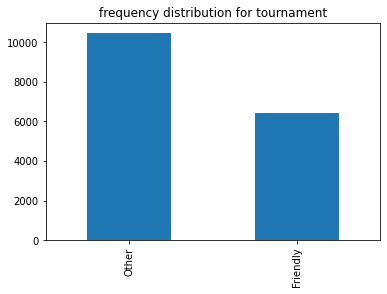

In [54]:
#  bar chart for tournament
# 

merged['tournament'].value_counts().plot.bar(title='frequency distribution for tournament')


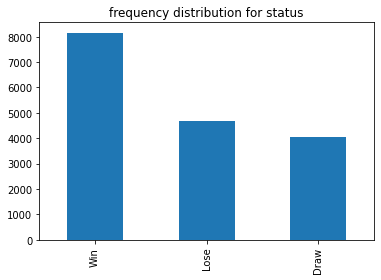

In [55]:
#  bar chart for status
# 

merged['status'].value_counts().plot.bar(title='frequency distribution for status')

In [56]:
merged.dtypes

date            object
home_team       object
away_team       object
home_score       int64
away_score       int64
tournament      object
country         object
home_rank        int64
home_country    object
away_rank        int64
away_country    object
status          object
dtype: object

#### Continuous Variables
#### Among the 12 columns we have 4 continuous variables: 'home_score', 'away_score', 'home_rank', and 'away_rank'.



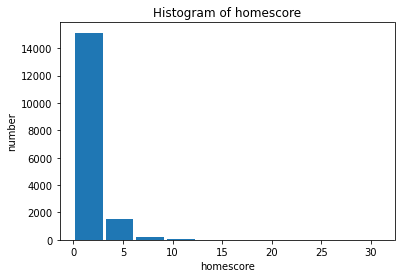

In [57]:
# Plotting a histogram to show distribution of the home score

homescore = merged['home_score']

plt.hist(homescore, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('homescore')
plt.ylabel('number')
plt.title('Histogram of homescore') 
plt.show()

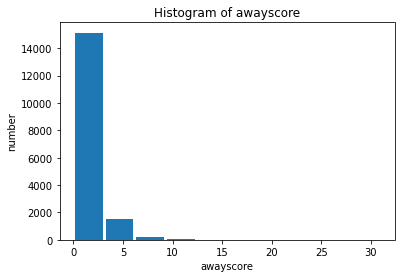

In [58]:
# Plotting a histogram to show distribution of the away score

awayscore = merged['away_score']

plt.hist(homescore, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('awayscore')
plt.ylabel('number')
plt.title('Histogram of awayscore') 
plt.show()

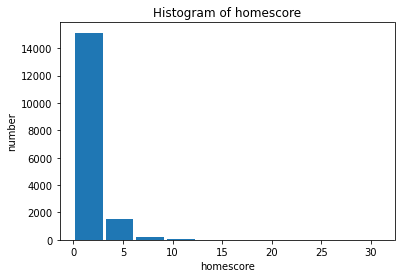

In [59]:
# Plotting a histogram to show distribution of the home score

homescore = merged['home_score']

plt.hist(homescore, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('homescore')
plt.ylabel('number')
plt.title('Histogram of homescore') 
plt.show()

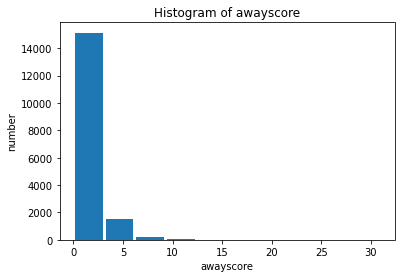

In [60]:
# Plotting a histogram to show distribution of the away score

awayscore = merged['away_score']

plt.hist(homescore, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('awayscore')
plt.ylabel('number')
plt.title('Histogram of awayscore') 
plt.show()

In [61]:
merged['away_rank'].value_counts()

1      156
26     147
2      145
6      141
36     140
      ... 
204     13
205     11
206      8
208      1
209      1
Name: away_rank, Length: 209, dtype: int64

##### a.) Measures of central tendency


In [62]:
merged.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'home_rank', 'home_country', 'away_rank',
       'away_country', 'status'],
      dtype='object')

In [63]:
# finding the mean of 'home_score', 'away_score', 'home_rank', and 'away_rank'

print(merged['home_score'].mean())
print(merged['away_score'].mean())
print(merged['home_rank'].mean())
print(merged['away_rank'].mean())

1.6046966731898238
1.069619877839056
76.02502520310739
78.85720215857202


In [64]:
# finding the median of 'home_score', 'away_score', 'home_rank', and 'away_rank'

print(merged['home_score'].median())
print(merged['away_score'].median())
print(merged['home_rank'].median())
print(merged['away_rank'].median())

1.0
1.0
70.0
72.0


In [65]:
# finding the mode of 'home_score', 'away_score', 'home_rank', and 'away_rank'

print(merged['home_score'].mode())
print(merged['away_score'].mode())
print(merged['home_rank'].mode())
print(merged['away_rank'].mode())

0    1
dtype: int64
0    0
dtype: int64
0    5
dtype: int64
0    1
dtype: int64


##### b.) Measures of dispersion

In [66]:
# finding the standard deviation of 'home_score', 'away_score', 'home_rank', and 'away_rank'

print(merged['home_score'].std())
print(merged['away_score'].std())
print(merged['home_rank'].std())
print(merged['away_rank'].std())

1.6159731538570996
1.2459462500782479
50.85108732990273
52.00677865112443


In [67]:
# finding the variance of 'home_score', 'away_score', 'home_rank', and 'away_rank'

print(merged['home_score'].var())
print(merged['away_score'].var())
print(merged['home_rank'].var())
print(merged['away_rank'].var())

2.6113692339868613
1.552382058084048
2585.833082633394
2704.705025667052


In [68]:
# finding the range- home score

maximum = merged['home_score'].max()
minimum = merged['home_score'].min()
range = maximum - minimum
range

31

In [69]:
# finfing the range of away score
# 

maximum1 = merged['away_score'].max()
minimum1 = merged['away_score'].min()
range1 = maximum1 - minimum1
range1

15

In [70]:
# finding the range of home rank
# 

maximum2= merged['home_rank'].max()
minimum2 = merged['home_rank'].min()
range2 = maximum2 - minimum2
range2

208

In [71]:
# finding the range of away rank
# 

maximum3 = merged['away_rank'].max()
minimum3 = merged['away_rank'].min()
range3 = maximum3 - minimum3
range3

208

In [72]:
# finding the quantiles of 'home_score', 'away_score', 'home_rank', and 'away_rank'

print(merged['home_score'].quantile([0.25,0.5,0.75]))
print(merged['away_score'].quantile([0.25,0.5,0.75]))
print(merged['home_rank'].quantile([0.25,0.5,0.75]))
print(merged['away_rank'].quantile([0.25,0.5,0.75]))

0.25    0.0
0.50    1.0
0.75    2.0
Name: home_score, dtype: float64
0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64
0.25     33.0
0.50     70.0
0.75    112.0
Name: home_rank, dtype: float64
0.25     35.0
0.50     72.0
0.75    115.0
Name: away_rank, dtype: float64


In [73]:
# computing skewness of 'home_score', 'away_score', 'home_rank', and 'away_rank'

print(merged['home_score'].skew())
print(merged['away_score'].skew())
print(merged['home_rank'].skew())
print(merged['away_rank'].skew())

2.326105498086301
1.9273984859675537
0.44831420045689047
0.4478304760682012


In [74]:
# computing kurtosis of 'home_score', 'away_score', 'home_rank', and 'away_rank'

print(merged['home_score'].kurt())
print(merged['away_score'].kurt())
print(merged['home_rank'].kurt())
print(merged['away_rank'].kurt())

15.265524946472665
7.156969287490188
-0.6875422770534168
-0.7060854274440063


### 6.2 Bivariate Analysis

#### Numerical and numerical

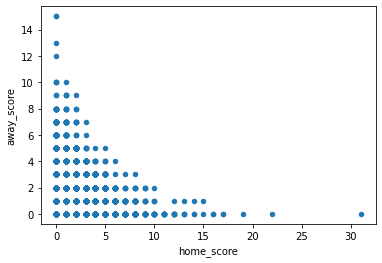

In [75]:
# plotting a scatter plot of the homescore and away score

merged.plot(x = 'home_score', y = 'away_score', kind='scatter')


The scatter plot shows there's no correlation between the ages of the respondents in the sample and the house size.

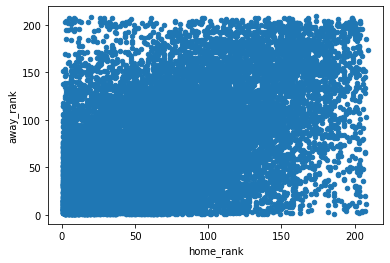

In [76]:
# plotting a scatter plot of the home rank and away rank

merged.plot(x = 'home_rank', y = 'away_rank', kind='scatter')

In [77]:
# calculating the correlation coefficient

coeff =merged['home_score'].corr(merged['away_score']) 
print(coeff)


-0.16373722025251877


In [78]:
# calculating the correlation coefficient

coeff1 =merged['home_rank'].corr(merged['away_rank']) 
print(coeff1)

0.46939262502884177


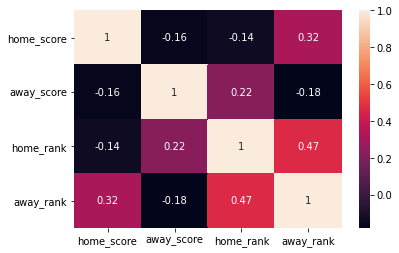

In [79]:
sns.heatmap(merged.corr(),annot=True)
plt.show()

#### Categorical and categorical


In [80]:
merged.dtypes

date            object
home_team       object
away_team       object
home_score       int64
away_score       int64
tournament      object
country         object
home_rank        int64
home_country    object
away_rank        int64
away_country    object
status          object
dtype: object

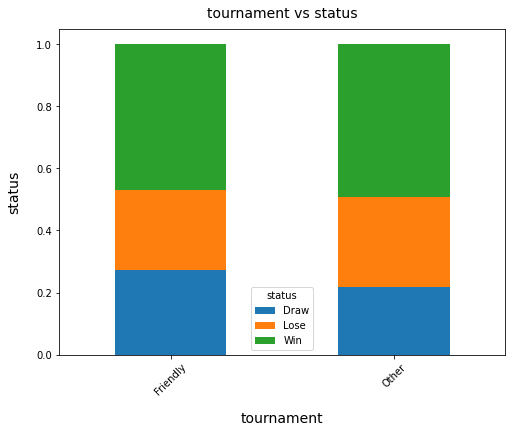

In [81]:
# plotting a stacked bar chart of the tornament and status

homet = merged.groupby('tournament')['status'].value_counts(normalize=True).unstack()
homet.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('tournament vs status', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('status', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('tournament', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

There are more wins in games that are not friendly

#### Numerical and Categorical

In [82]:
merged.dtypes

date            object
home_team       object
away_team       object
home_score       int64
away_score       int64
tournament      object
country         object
home_rank        int64
home_country    object
away_rank        int64
away_country    object
status          object
dtype: object

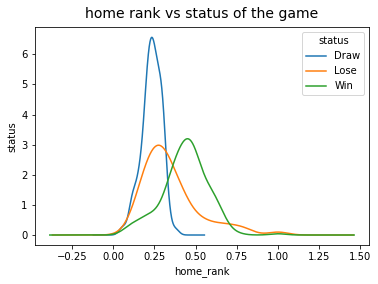

In [83]:
# comparing the home team rank and status of the game

# Plotting our line graph
merged.groupby('home_rank')['status'].value_counts(normalize=True).unstack().plot(kind='kde')

# Giving a title to our line graph
plt.title('home rank vs status of the game', fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('status')

# Labelling the x-axis
plt.xlabel('home_rank')
 
# Displaying our graph
plt.show()

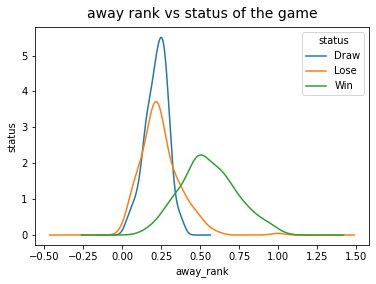

In [84]:
# comparing the away team rank and status of the game

# Plotting our line graph
merged.groupby('away_rank')['status'].value_counts(normalize=True).unstack().plot(kind='kde')

# Giving a title to our line graph
plt.title('away rank vs status of the game', fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('status')

# Labelling the x-axis
plt.xlabel('away_rank')
 
# Displaying our graph
plt.show()

##**7**. Implementing the Solution

### Checking for multicollinearity

In [85]:
#Import libaries

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [86]:
# make a copy of a our dataset
# 
merged_copy = merged.copy()
merged_copy.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,home_country,away_rank,away_country,status
0,1993-08,Colombia,Paraguay,0,0,Other,Colombia,19,Colombia,67,Paraguay,Draw
1,1993-08,Colombia,Argentina,2,1,Other,Colombia,19,Colombia,5,Argentina,Win
2,1993-08,Colombia,Peru,4,0,Other,Colombia,19,Colombia,70,Peru,Win
3,1993-08,Peru,Argentina,0,1,Other,Peru,70,Peru,5,Argentina,Lose
4,1993-08,Peru,Colombia,0,1,Other,Peru,70,Peru,19,Colombia,Lose


In [87]:
# checking for multicollinearity
# 
correlations = merged_copy.corr()

correlations

,home_score,away_score,home_rank,away_rank
home_score,1.000000,-0.163737,-0.135335,0.318863
away_score,-0.163737,1.000000,0.221734,-0.179906
home_rank,-0.135335,0.221734,1.000000,0.469393
away_rank,0.318863,-0.179906,0.469393,1.000000


In [88]:
# compute the VIF
# 
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,home_rank,away_rank
home_score,1.259276,-0.008250,0.463565,-0.620614
away_score,-0.008250,1.180141,-0.466462,0.433899
home_rank,0.463565,-0.466462,1.635230,-0.999298
away_rank,-0.620614,0.433899,-0.999298,1.745015


The VIF score for each variable is found alongside the downwards sloping diagonal. In this case they are fairly okay since they are below 4

### Polynomial Regression

HOME SCORES

In [89]:
merged_copy.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,home_country,away_rank,away_country,status
0,1993-08,Colombia,Paraguay,0,0,Other,Colombia,19,Colombia,67,Paraguay,Draw
1,1993-08,Colombia,Argentina,2,1,Other,Colombia,19,Colombia,5,Argentina,Win
2,1993-08,Colombia,Peru,4,0,Other,Colombia,19,Colombia,70,Peru,Win
3,1993-08,Peru,Argentina,0,1,Other,Peru,70,Peru,5,Argentina,Lose
4,1993-08,Peru,Colombia,0,1,Other,Peru,70,Peru,19,Colombia,Lose


In [90]:

poly_reg_data =  merged_copy.groupby(['home_rank']).mean()

poly_reg_data.head()

,home_score,away_score,away_rank
home_rank,,,
1,2.381250,0.643750,36.900000
2,2.129032,0.658065,42.974194
3,2.149660,0.768707,39.081633
4,2.064103,0.737179,43.628205
5,1.993939,0.757576,43.551515


In [91]:
# to get the x and y variables

X = poly_reg_data.index.values.reshape(-1,1)

y = poly_reg_data['home_score'].values.reshape(-1,1)


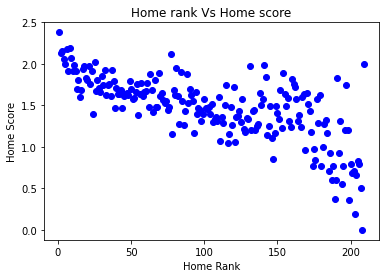

In [92]:
#  Visualizing the dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('Home rank Vs Home score')
plt.xlabel('Home Rank')
plt.ylabel('Home Score')
plt.show()

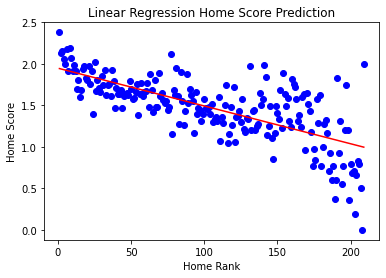

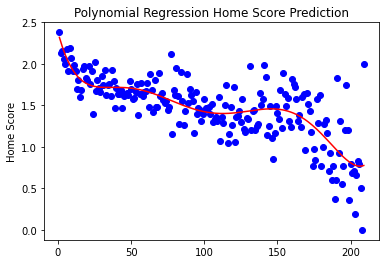

In [93]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset
# to compare the linear regression model to the polynomial regression model
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Linear Regression Home Score Prediction')
plt.xlabel('Home Rank')
plt.ylabel('Home Score')
plt.show()

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # To help highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Polynomial Regression Home Score Prediction')
plt.ylabel('Home Score')
plt.show()

In [94]:
# Predict using Polynomial Regression
# 

poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)



Polynomial prediction: 2


Cross validation using KFold

In [95]:
from sklearn.model_selection import KFold
from sklearn import metrics

folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1  
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.16912367657615585

Training model 2
Model 2 Root Mean Squared Error: 0.18783619177916167

Training model 3
Model 3 Root Mean Squared Error: 0.1805771493419052

Training model 4
Model 4 Root Mean Squared Error: 0.3693381330626695

Training model 5
Model 5 Root Mean Squared Error: 0.507060740456974


Model 1 has the least RMSE making it most suitable for making presictions of the home scores

Residual Plots

In [96]:
residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.2558189287562787

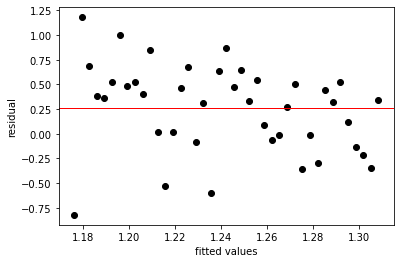

In [97]:
# plotting our residuals
# 

import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Heteroskedasticity

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

AWAY SCORES

In [106]:
poly_reg_data1 =  merged_copy.groupby(['away_rank']).mean()

poly_reg_data1.head()

,home_score,away_score,home_rank,status
away_rank,,,,
1,0.891026,1.980769,39.147436,0.935897
2,0.786207,1.855172,42.834483,0.924138
3,0.946565,1.893130,46.290076,0.862595
4,0.818841,1.601449,43.014493,0.963768
5,1.141732,1.724409,37.322835,1.015748


In [107]:
# to get the x and y variables

x = poly_reg_data1.index.values.reshape(-1,1)

Y = poly_reg_data1['away_score'].values.reshape(-1,1)

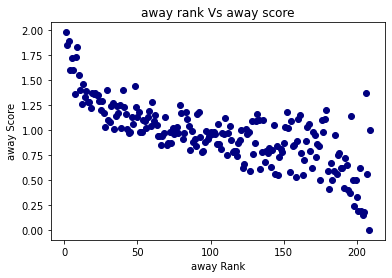

In [108]:
#  Visualizing the dataset by plotting a scatter plot

plt.scatter(x, Y, color='navy') 
plt.title('away rank Vs away score')
plt.xlabel('away Rank')
plt.ylabel('away Score')
plt.show()

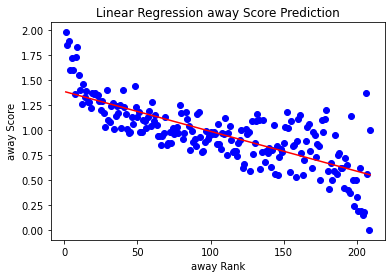

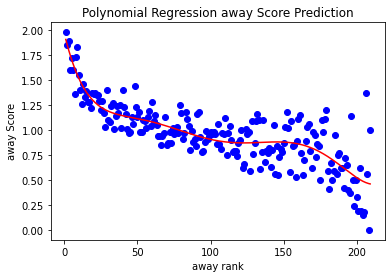

In [109]:
# Split the dataset into train and test sets
x_train, Y_train, x_test, Y_test = train_test_split(x,Y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset
# to compare the linear regression model to the polynomial regression model
reg_line = LinearRegression()
reg_line.fit(x,Y)

# Visualize the Linear Regression results
plt.scatter(x,Y, color='blue') 
plt.plot(x, reg_line.predict(x), color='red')
plt.title('Linear Regression away Score Prediction')
plt.xlabel('away Rank')
plt.ylabel('away Score')
plt.show()

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
x_poly = poly_reg.fit_transform(x)


pol_reg = LinearRegression()
pol_reg.fit(x_poly, Y)


#Visualize the Polynomial Regression results
plt.scatter(x, Y, color='blue') # To help highlight the data points
plt.plot(x, pol_reg.predict(x_poly), color='red')
plt.title('Polynomial Regression away Score Prediction')
plt.xlabel('away rank')
plt.ylabel('away Score')
plt.show()

In [110]:
# Predict using Polynomial Regression
# 
poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)




Polynomial prediction: 1


Cross Validation with KFold

In [111]:
from sklearn.model_selection import KFold
from sklearn import metrics

folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(x)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 
for train_index, test_index in folds.split(x):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  x_train, x_test = x[train_index], x[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(x_train, Y_train)
  
  # assess the accuraccy of the model
  Y_pred = regressor.predict(x_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.27192449474057717

Training model 2
Model 2 Root Mean Squared Error: 0.17006607622918926

Training model 3
Model 3 Root Mean Squared Error: 0.13550916830450604

Training model 4
Model 4 Root Mean Squared Error: 0.21863810731553593

Training model 5
Model 5 Root Mean Squared Error: 0.29830126924426864


Model 3 has the least RMSE making it most suitable for making predictions

In [112]:
residuals1 = np.subtract(Y_pred, Y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals1.mean()

-0.019846947913330807

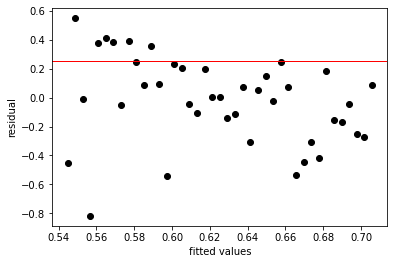

In [113]:
import matplotlib.pyplot as plt

plt.scatter(Y_pred, residuals1, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(Y_pred, residuals1)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(Y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


### Logistic Regression

In [99]:
merged_copy.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,home_country,away_rank,away_country,status
0,1993-08,Colombia,Paraguay,0,0,Other,Colombia,19,Colombia,67,Paraguay,Draw
1,1993-08,Colombia,Argentina,2,1,Other,Colombia,19,Colombia,5,Argentina,Win
2,1993-08,Colombia,Peru,4,0,Other,Colombia,19,Colombia,70,Peru,Win
3,1993-08,Peru,Argentina,0,1,Other,Peru,70,Peru,5,Argentina,Lose
4,1993-08,Peru,Colombia,0,1,Other,Peru,70,Peru,19,Colombia,Lose


In [100]:
# performing label encoding
# 

from sklearn import preprocessing
 
lc = preprocessing.LabelEncoder() 
 
merged_copy['status']= lc.fit_transform(merged_copy['status']) 

merged_copy['status'].unique()

#Previewing the dataset
merged_copy.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,home_country,away_rank,away_country,status
0,1993-08,Colombia,Paraguay,0,0,Other,Colombia,19,Colombia,67,Paraguay,0
1,1993-08,Colombia,Argentina,2,1,Other,Colombia,19,Colombia,5,Argentina,2
2,1993-08,Colombia,Peru,4,0,Other,Colombia,19,Colombia,70,Peru,2
3,1993-08,Peru,Argentina,0,1,Other,Peru,70,Peru,5,Argentina,1
4,1993-08,Peru,Colombia,0,1,Other,Peru,70,Peru,19,Colombia,1


In [101]:
# Splitting our dataset
#
X = merged_copy[['home_score', 'away_score', 'home_rank', 'away_rank']]
y = merged_copy['status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [102]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [104]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The results from the confusion matrix tell us that 1236,1418 and 2405 are the number of correct predictions. 


array([[1236,    0,    0],
       [   0, 1418,    0],
       [   0,    0, 2405]])

In [105]:
# use accuracy_score function to compute the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_pred)

# print the accuracy value
print('Accuracy: ', accuracy1)

print("")

# import confusion_matrix to be used in creating a confusion matrix of the predictions
from sklearn.metrics import confusion_matrix

# apply confusion matrix to y_test and y_prediction to obtain number of correct and wrong predictions per category
confusion_matrix1 = confusion_matrix(y_test, y_pred)
# print the matrix
print('Confusion Matrix') 
print(confusion_matrix1)

Accuracy:  1.0

Confusion Matrix
[[1236    0    0]
 [   0 1418    0]
 [   0    0 2405]]


##**8**. Challenging the solution

##**9**. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes we did, we had a good sample size that looked into key factors that would help us predict the game scores



### b). Do we need other data to answer our question?
Not necessarily because the dataset we used answered our question.

### c). Did we have the right question?

Yes we did, we were able to create models that helped made predictions of the game scores


### Conclusion
Our logistic Regression model has an accuracy of 1 which is very good.